<h1><font face='Calibri' color="#001A56" size=+3.5><b>
    Projeto 03: O que vende um carro
    </b></font></h1>
    
<h3><font face='Calibri' color="#001A56" size=+1.5>
    Bootcamp em análise de dados, Practicum by Yandex.
    </font></h3>
    
<hr>

<font face='Calibri' color="#001A56" size=+0.8>
    Na terceira <i>sprint</i> do bootcamp em análise de dados, conhecemos a etapa de Análise Exploratória de Dados, como fazer análise inicial de dados para encontrar padrões, criação de gráficos básicos e elaboração das primeiras
hipóteses. Esse é o projeto de conclusão da <i>sprint</i> 03.
    </font>

<hr>

<a id='back'></a>
<h2><font face='Calibri' color="#001A56" size=+3.0>
    Índice.
    </font></h2>

<font face='Calibri' color="#001A56" size=+0.8>
    
* [Introdução](#intro)
    * [Dados](#dados)
* [Visão geral dos dados](#data_review)
    * [Conclusões](#data_review_conclusions)
* [Pré-processamento de dados](#data_preprocessing)
    * [Valores ausentes](#missing_values)
    * [Enriquecendo os dados](#ED)
* [Análise exploratória de dados](#EAD)
    * [Análise inicial dos parâmetros](#01)
    * [Tratando os valores atípicos](#02)
    * [Análise dos parâmetros após exclusão de valores atípicos.](#03)
    * [Tempo de vida das propagandas](#04)
    * [Média de preços dos diferentes tipos de veículos](#05)
    * [Fatores de preço](#06)
        * [Idade](#f1)
        * [Quilometragem](#f2)
        * [Condições](#f3)
        * [Tipo de transmissão](#f4)
        * [Cor do veículo](#f5)
* [Conclusão](#end)
* [Fontes](#fontes)
* [Contatos](#contato)   
 
<p>
    
    
 <hr>

<a id='intro'></a>
<h2><font face='Calibri' color="#001A56" size=+3.0>
    Introdução
    </font></h2> 
     <p>    
<font face='Calibri' color="#001A56" size=+0.8>
Centenas de propagandas gratuitas de veículos são publicadas no site Lista de Eixo de Manivela todos os dias. Nosso objetivo é estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.
    </font>

<h3><font face='Calibri' color="#013294" size=+2.0>
    Dados
    </font></h3>
    <p>
<font face='Calibri' color="#001A56" size=+0.8>    
Os dados que iremos utilizar estão armazenados no arquivo <code>vehicles_us.csv</code> e contém os seguintes campos:
    <ul>
        <li><code>price</code> — Preço do veículo.
        <li><code>model_year</code> — Ano do modelo.
        <li><code>model</code> — Modelo do veículo.
        <li><code>condition</code> — Condições do veículo.
        <li><code>cylinders</code> — Quantidade de cilindros
        <li><code>fuel</code> — Tipo do combústivel.
        <li><code>odometer</code> — Quilometragem do veículo quando a propaganda foi publicada.
        <li><code>transmission</code> — Tipo da transmissão.
        <li><code>paint_color</code> — Cor do veículo
        <li><code>is_4wd</code> — Se o veículo é 4 por 4 (tipo Booleano).
        <li><code>date_posted</code> — Data que a propaganda foi publicada.
        <li><code>days_listed</code> — Dias desde a publicação até a retirada.
            </ul

        
<p>


    
[Voltar ao Índice](#back)
        
 <p>   
    
<hr>

<h2><font face='Calibri' color="#001A56" size=+3.0>
Visão geral dos dados
    </font></h2><a id='data_review'></a>
<p>
<font face='Calibri' color="#001A56" size=+0.8>
Importaremos os dados presentes no arquivo <code>vehicles_us.csv</code> e as demais bibliotecas que serão utilizadas ao longo do projeto.

In [1]:
# Importando bibliotecas
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando os dados
df = pd.read_csv('vehicles_us.csv')

# Exibindo informações dos dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
# Descrição dos dados.
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
# Exibindo as primeiras linhas.
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<a id='data_review_conclusions'></a> 
<h3><font face='Calibri' color="#013294" size=+2.0>
    Conclusões
    </font></h3><a id='dados'></a><p> 
    
<font face='Calibri' color="#001A56" size=+0.8><p>
Temos 4 colunas com valores ausentes, será preciso analisar se há alguma correlação dessas ausências com as demais informações. Também temos colunas que precisaremos alterar o tipo dos dados.
    
</p> <font face='Calibri' color="#001A56" size=+0.8>
A coluna <b>model_year</b> possuí dados do tipo <i>float</i>, será necessário altera-los para inteiros pois tratam-se de anos, assim como a coluna <b>cylinders</b>. A coluna <b>is_4wd</b> são dados booleanos, também deverá ser alterado.
    

Nem todas colunas possuem valores ausentes, as colunas que possuem valores ausentes são: <b>'model_year', 'cilinders', 'odometer', 'paint_color'</b>. A coluna <b>is_4wd</b> aparentemente também tem valores ausentes, mas isso ocorreu por ser um dado do tipo booleano, será necessário alterar isso para corrigir os valores ausentes.
    
    
[Voltar ao Índice](#back)
    
<hr>

<a id='data_preprocessing'></a>
<h2><font face='Calibri' color="#001A56" size=+3.0>
Pré-processamento de dados
    </font></h2>
<p>
<font face='Calibri' color="#001A56" size=+0.8> 
Nessa etapa iremos análisar e tratar os valores ausentes, alterar o tipo dos dados daqueles que precisam de alteração e se possível incluir mais informações à tabela.

<a id='missing_values'></a>
<h3><font face='Calibri' color="#013294" size=+2.0>
Valores ausentes
    </font></h3>
<p>
<font face='Calibri' color="#001A56" size=+0.8> 

In [5]:
# Calculando a porcentagem de valores ausentes das colunas.
df.isna().sum() / len(df)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

In [6]:
# Verificando a correlação entre as informações.
df.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,0.005517,0.003804,NaN,1.000000


<font face='Calibri' color="#001A56" size=+0.8> 
Como a coluna <b>is_4wd</b> está em um tipo de dado que não é possível calcular a correlação com os demais dados, iremos altera-lá para prosseguir com as demais análises.
    
Para alterar o tipo de dados para números inteiros iremos utilizar uma classificação binária, onde 1 representa os carros que tem tração nas 4 rodas(4wd). Os dados que estão como valores ausentes (NaN) são os que não possuem tração nas 4 rodas, esses serão representados pelo número 0.

<h4><font face='Calibri' color="#1E90B6" size=+1.0>
Coluna <code>is_4wd</code>
    </font></h4>

In [7]:
# Função para classificação binária.
def correção_4wd (row):
    if pd.isna(row['is_4wd']):
        return 0
    else:
        return 1
    
# Testando a função para dados com valores ausentes.
correção_4wd(df[df['is_4wd'].isna()].iloc[0])

0

In [8]:
# Checando o dado.
df[df['is_4wd'].isna()].iloc[0]

price                     5500
model_year              2013.0
model           hyundai sonata
condition             like new
cylinders                  4.0
fuel                       gas
odometer              110000.0
transmission         automatic
type                     sedan
paint_color                red
is_4wd                     NaN
date_posted         2019-02-07
days_listed                 79
Name: 2, dtype: object

In [9]:
# Aplicando a função.
df['is_4wd'] = df.apply(correção_4wd, axis=1)

In [10]:
# Contando os valores após preencher valores ausentes.
df['is_4wd'].value_counts(dropna = False)

0    25953
1    25572
Name: is_4wd, dtype: int64

<font face='Calibri' color="#001A56" size=+0.8>
Os dados foram preenchidos corretamente, agora possuímos o mesmo número de entradas com valores igual a 1 e o restante foi preenchido com 0.

<h4><font face='Calibri' color="#1E90B6" size=+1.0>
Coluna <code>paint_color</code>
    </font></h4>
<p>    
<font face='Calibri' color="#001A56" size=+0.8>    
Iremos salvar os dados em uma nova variável para que posssamos recuperar os dados originais caso seja preciso.

In [11]:
# Salvando os dados em uma nova variável.
data = df

# Exibindo informações.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  int64  
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


In [12]:
# Exibindo a proporção das cores.
data['paint_color'].value_counts(normalize=True, dropna=False)

white     0.194643
NaN       0.179854
black     0.149287
silver    0.121184
grey      0.097758
blue      0.086851
red       0.085803
green     0.027094
brown     0.023736
custom    0.022377
yellow    0.004949
orange    0.004483
purple    0.001980
Name: paint_color, dtype: float64

In [13]:
# Exibindo a quantidade de cores por tipo de veículos.
data.pivot_table(index='type', columns='paint_color', values='price', aggfunc='count')

paint_color,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
type,,,,,,,,,,,,
SUV,2220.0,1055.0,369.0,308.0,436.0,1183.0,84.0,39.0,906.0,1558.0,1962.0,49.0
bus,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN
convertible,73.0,32.0,2.0,8.0,16.0,19.0,5.0,NaN,104.0,43.0,56.0,13.0
coupe,470.0,205.0,21.0,21.0,40.0,191.0,34.0,5.0,379.0,259.0,204.0,68.0
hatchback,128.0,128.0,13.0,11.0,39.0,103.0,11.0,3.0,103.0,159.0,130.0,6.0
mini-van,123.0,174.0,37.0,18.0,22.0,139.0,NaN,1.0,89.0,192.0,160.0,4.0
offroad,23.0,19.0,3.0,5.0,17.0,16.0,1.0,NaN,39.0,19.0,31.0,5.0
other,39.0,27.0,9.0,5.0,9.0,33.0,4.0,1.0,21.0,20.0,41.0,2.0
pickup,938.0,517.0,186.0,44.0,198.0,554.0,28.0,10.0,651.0,666.0,1854.0,15.0


<font face='Calibri' color="#001A56" size=+0.8>    
Iremos preencher os valores ausentes em 'paint_color' com 'unknown' devido aos seguintes motivos:
<ul>
<li>A cor do veículo não está atrelada diretamente a outra característica do veículo.
<li>Por se tratar de uma informação categórica e não quantitativa não podemos simplesmente preecher com a moda ou com a média, pois dessa forma distorceriamos os dados.
<li>A quantidade de dados ausentes nessa coluna e uma quantidade muito significativa (aproximadamente 18%) e por esse motivo não serão excluídos.
<li>Uma outra hipótese que podemos levantar é, o fato do veículo não ter a informação da cor influênciaria no preço?

In [14]:
# Preenchendo os valores ausentes.
data['paint_color'] = data['paint_color'].fillna('unknown')

In [15]:
# Verificando se os valores ausentes foram preenchidos
data.isna().sum() / len(data)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.000000
is_4wd          0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

<font face='Calibri' color="#001A56" size=+0.8>
Os valores ausentes em <b>paint_color</b> foram totalmente preenchidos.

Agora iremos realizar o preenchimento dos valores ausentes em <b>model_year</b>, pois essa informação pode nos auxiliar no preenchimento dos valores ausentes em <b>cylinders</b> e <b>odometer</b>.

<h4><font face='Calibri' color="#1E90B6" size=+1.0>
Coluna <code>model_year</code>
    </font></h4>

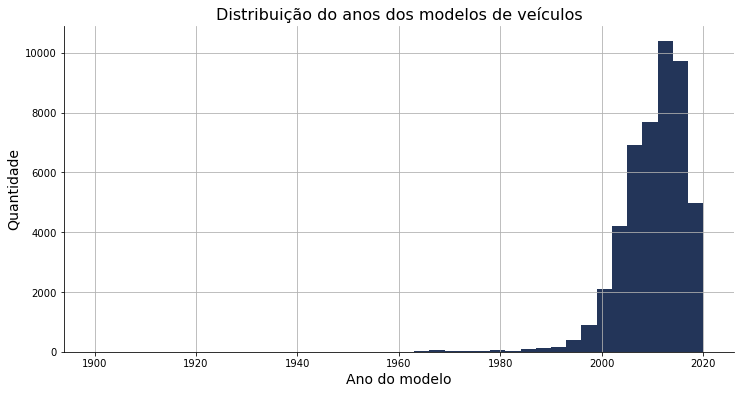

In [16]:
# Gráfico de distribuição de model_year
data['model_year'].hist(range=(1900, 2020), bins=40, figsize=(12, 6), color='#233559')
plt.title("Distribuição do anos dos modelos de veículos", fontsize=16)
plt.ylabel('Quantidade', fontsize=14)
plt.xlabel('Ano do modelo', fontsize=14)
sns.despine()

In [17]:
# Agrupando os dados e calculando a mediana.
data.groupby(['model', 'transmission',  'condition'])['model_year'].median().head(30)

model              transmission  condition
acura tl           automatic     excellent    2009.0
                                 fair         2004.0
                                 good         2007.0
                                 like new     2007.0
                   manual        excellent    2004.5
                                 fair         2004.0
                                 good         2005.5
                                 like new     2010.0
bmw x5             automatic     excellent    2011.0
                                 fair         2004.0
                                 good         2006.0
                                 like new     2009.0
                   manual        excellent    2007.0
                                 good         2005.0
                   other         excellent    2001.0
buick enclave      automatic     excellent    2012.0
                                 fair         2011.0
                                 good         2011.0
   

<font face='Calibri' color="#001A56" size=+0.8>
Para substituir os valores ausentes em <b>model_year</b> irei agrupar os dados por modelo, transmissão e condição, e utilizar a mediana de <b>model_year</b> dos dados agrupados. Será utilizada a mediana pois temos valores atípicos em <b>model_year</b> que podem distocer a média, que como exemplo podemos citar os carros de coleção.

In [18]:
# Agrupando os dados e preenchendo os valores ausentes.
data['model_year'].fillna(
    data.groupby(['model', 'transmission', 'condition'])['model_year'].transform('median'), inplace=True)

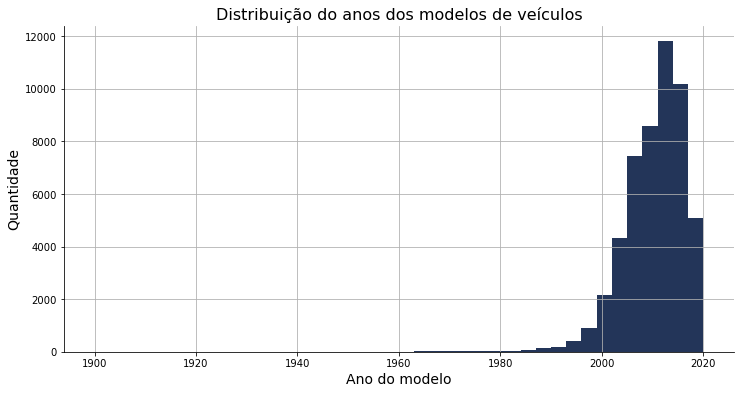

In [19]:
# Gráfico de distribuição de model_year após preenchimento de valores ausentes.
data['model_year'].hist(range=(1900, 2020), bins=40, figsize=(12, 6), color='#233559')
plt.title("Distribuição do anos dos modelos de veículos", fontsize=16)
plt.ylabel('Quantidade', fontsize=14)
plt.xlabel('Ano do modelo', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Aparentemente o preenchimento de valores ausentes não alterou de maneira significativa a distribuição dos dados.

In [20]:
# Verificando se todos os valores foram preenchidos.
data.isna().sum() / len(df)

price           0.000000
model_year      0.000330
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.000000
is_4wd          0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

<font face='Calibri' color="#001A56" size=+0.8>
Realizamos o preenchimento dos valores ausentes utilizando a mediana de <b>model_year</b> dos dados que já possuímos agrupando-os por modelo, tipo de transmissão e condições. Pois como sabemos, carros antigos tendem a ter câmbio manual enquanto os mais novos câmbio automático. A mesma lógica utilizei para as condições, carros mais antigos tendem a ter piores condições que o mais novos.

Agrupando os dados dessa forma, não foi possível preencher todos os dados ausentes da coluna <b>model_year</b> restando ainda aproximadamente 0,03%, como a quantidade de dados ausentes que restaram foi muito pequena iremos excluí-los.

In [21]:
# Excluíndo o restante de valores ausentes em model_year
data = data.dropna(subset=['model_year']).reset_index(drop=True)

# Exibindo as informações da tabela
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51508 entries, 0 to 51507
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51508 non-null  int64  
 1   model_year    51508 non-null  float64
 2   model         51508 non-null  object 
 3   condition     51508 non-null  object 
 4   cylinders     46251 non-null  float64
 5   fuel          51508 non-null  object 
 6   odometer      43617 non-null  float64
 7   transmission  51508 non-null  object 
 8   type          51508 non-null  object 
 9   paint_color   51508 non-null  object 
 10  is_4wd        51508 non-null  int64  
 11  date_posted   51508 non-null  object 
 12  days_listed   51508 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


<font face='Calibri' color="#001A56" size=+0.8>
Iremos aproveitar para alterar o tipo de dados da coluna <b>model_year</b> para números inteiro que é o tipo de dado mais adequado para representar essa informação.

In [22]:
# Alterando o tipo dos dados de model_year
data['model_year'] = data['model_year'].astype(int)

# Exibindo as informações.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51508 entries, 0 to 51507
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51508 non-null  int64  
 1   model_year    51508 non-null  int32  
 2   model         51508 non-null  object 
 3   condition     51508 non-null  object 
 4   cylinders     46251 non-null  float64
 5   fuel          51508 non-null  object 
 6   odometer      43617 non-null  float64
 7   transmission  51508 non-null  object 
 8   type          51508 non-null  object 
 9   paint_color   51508 non-null  object 
 10  is_4wd        51508 non-null  int64  
 11  date_posted   51508 non-null  object 
 12  days_listed   51508 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(7)
memory usage: 4.9+ MB


<font face='Calibri' color="#001A56" size=+0.8>
Os dados foram alterados e os valores ausentes da coluna foram eliminados, trataremos agora da coluna <b>cylinders</b>

<h4><font face='Calibri' color="#1E90B6" size=+1.0>
Coluna <code>cylinders</code>
    </font></h4>

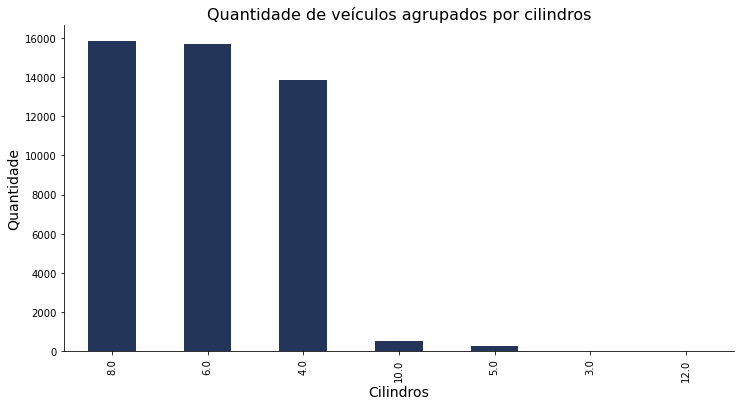

In [23]:
# Gráfico da quantidade de carros por cilindros.
data['cylinders'].value_counts().plot(kind='bar', figsize=(12, 6), color='#233559')
plt.title("Quantidade de veículos agrupados por cilindros", fontsize=16)
plt.ylabel('Quantidade', fontsize=14)
plt.xlabel('Cilindros', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Com o gráfico acima podemos observar a distribuição inicial da quantidade de veículos conforme a quantidade de cilindros. Os mais comuns são os carros com 8, 6 e 4 cilindros. Agora iremos agrupar os carros por modelo e ano para calcularmos a mediana de cada grupo.

In [24]:
# Agrupando por modelo e ano para encontrar a mediana.
data.groupby(['model', 'model_year',])['cylinders'].median().head(20)

model     model_year
acura tl  1999          6.0
          2001          6.0
          2002          6.0
          2003          6.0
          2004          6.0
          2005          6.0
          2006          6.0
          2007          6.0
          2008          6.0
          2009          6.0
          2010          6.0
          2011          6.0
          2012          6.0
          2013          6.0
          2014          6.0
bmw x5    2001          8.0
          2002          6.0
          2003          8.0
          2004          6.0
          2005          6.0
Name: cylinders, dtype: float64

<font face='Calibri' color="#001A56" size=+0.8>
O mesmo modelo de carro pode ter a quantidade de cilindros diferente dependendo do ano do modelo, e também modelos com quantidade de cilindros diferentes apesar de serem do mesmo ano.
    
Iremos utilizar a mediana para preencher os valores ausentes, pois ela irá retornar o valor central dentro de cada grupo e teremos menos valores com casa decimais que não representam a quantidade de cilindros dos veículos do que se usassemos a média. Dessa forma ficará mais fácil de realizar a correção mesmo quando a mediana retornar um número casas decimais.  

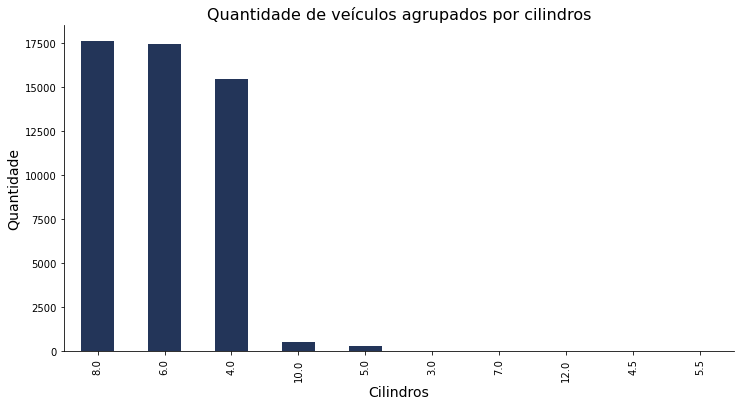

In [25]:
# Preenchendo os valores ausentes.
data['cylinders'].fillna(data.groupby(['model', 'model_year',])['cylinders'].transform('median'), inplace=True)

# Exibindo novamente o gráfico
data['cylinders'].value_counts().plot(kind='bar', figsize=(12, 6), color='#233559')
plt.title("Quantidade de veículos agrupados por cilindros", fontsize=16)
plt.ylabel('Quantidade', fontsize=14)
plt.xlabel('Cilindros', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Após preenchimento dos valores ausentes a distribuição permaneceu muito parecida com a inicial, o que demonstra que não distorcemos os dados. Notamos que agora temos outros valores que precisam ser corrigidos (4.5, 5.5 e 7) que não representam valores reais para quantidade de cilindros. Para isso iremos criar uma função que substituirá esse números por 4, 5 e 6, respectivamente.

In [26]:
# Criando função
def correcao_cilindros (row):
    if row['cylinders'] == 4.5:
        return 4.0
    elif row['cylinders'] == 5.5:
        return 5.0
    elif row['cylinders'] == 7.0:
        return 6.0
    else:
        return row['cylinders']
    
# Testando a função
correcao_cilindros(data.iloc[0])

6.0

In [27]:
data['cylinders'].iloc[0]

6.0

In [28]:
# Aplicando a função para correção
data['cylinders'] = data.apply(correcao_cilindros, axis=1)

# Quantidade de automáveis por cilindros
data['cylinders'].value_counts(dropna=False)

8.0     17639
6.0     17458
4.0     15486
10.0      563
5.0       299
3.0        34
NaN        27
12.0        2
Name: cylinders, dtype: int64

<font face='Calibri' color="#001A56" size=+0.8>
Ainda possuímos valores ausentes na colunas <b>cylinders</b>, vamos verificá-los.

In [29]:
# Filtrando os valores ausentes em uma nova variável
missing_cylinders = data[data['cylinders'].isna()]

# Exibindo a tabela
missing_cylinders.head(30)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1101,9200,1975,ford f-150,excellent,NaN,gas,NaN,automatic,truck,green,0,2018-08-28,40
3139,3900,2003,ford f-350 sd,good,NaN,gas,NaN,automatic,truck,black,1,2018-06-20,59
3844,1900,1986,nissan sentra,excellent,NaN,gas,NaN,manual,coupe,blue,0,2018-10-29,63
3914,9750,2007,chevrolet silverado 1500 crew,excellent,NaN,gas,133000.0,automatic,pickup,grey,0,2018-08-22,55
5870,2500,2003,ford f150 supercrew cab xlt,good,NaN,gas,169000.0,automatic,truck,green,1,2019-01-17,18
6932,4000,1993,ford f150,excellent,NaN,gas,NaN,automatic,truck,unknown,1,2019-01-28,18
6982,3900,1977,chevrolet suburban,fair,NaN,gas,NaN,automatic,SUV,custom,0,2019-02-02,71
7113,84900,2019,ford f350,new,NaN,diesel,9000.0,automatic,pickup,white,1,2019-03-26,7
7121,6900,2009,jeep cherokee,excellent,NaN,gas,130023.0,automatic,SUV,black,1,2018-09-03,19
11051,4500,2009,nissan frontier,excellent,NaN,gas,86000.0,manual,pickup,white,0,2018-07-18,6


In [30]:
# Checando a proporção dos valores ausentes.
data.isna().sum() / len(df)

price           0.000000
model_year      0.000000
model           0.000000
condition       0.000000
cylinders       0.000524
fuel            0.000000
odometer        0.153149
transmission    0.000000
type            0.000000
paint_color     0.000000
is_4wd          0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

<font face='Calibri' color="#001A56" size=+0.8>
Realizamos o preenchimento dos valores ausentes utilizando a mediana de <b>cylinders</b> dos dados que já possuímos agrupando-os por modelo, e ano do modelo. Afinal essas caracteristicas tem relação com a quantidade de cilindros do carro.

Agrupando os dados dessa forma, não foi possível preencher todos os dados ausentes da coluna <b>cylinders</b> restando ainda aproximadamente 0,05%, pois não há carros do mesmo modelo e ano nos dados que possuímos com valores nessa coluna. Como a quantidade de dados ausentes que restaram foi muito pequena iremos excluí-los.
    
Depois disso alteraremos os dados da coluna <b>cylinders</b> de <i>float</i> para <i>int</i>, que é o tipo mais adequado para essa informação.

In [31]:
# Excluíndo dados com valores ausentes
data = data.dropna(subset=['cylinders']).reset_index(drop=True)

# Alterando o tipo dos dados
data['cylinders'] = data['cylinders'].astype(int)

# Exibindo informações da tabela
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51481 entries, 0 to 51480
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51481 non-null  int64  
 1   model_year    51481 non-null  int32  
 2   model         51481 non-null  object 
 3   condition     51481 non-null  object 
 4   cylinders     51481 non-null  int32  
 5   fuel          51481 non-null  object 
 6   odometer      43597 non-null  float64
 7   transmission  51481 non-null  object 
 8   type          51481 non-null  object 
 9   paint_color   51481 non-null  object 
 10  is_4wd        51481 non-null  int64  
 11  date_posted   51481 non-null  object 
 12  days_listed   51481 non-null  int64  
dtypes: float64(1), int32(2), int64(3), object(7)
memory usage: 4.7+ MB


<h4><font face='Calibri' color="#1E90B6" size=+1.0>
Coluna <code>odometer</code>
    </font></h4>
    <p>
<font face='Calibri' color="#001A56" size=+0.8>
Inicialmente acreditamos que quanto mais velhos são os carros, maior é a quilometragem rodada, por esse motivo analisaremos a distribuição dos valores da coluna <b>odometer</b> assim como a presença de valores atípicos. 

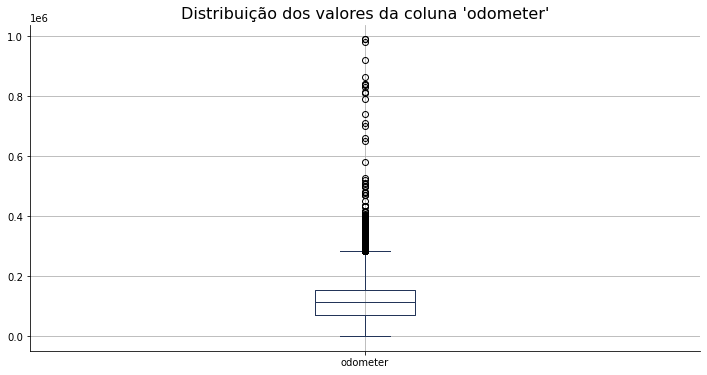

In [32]:
# Plotando gráfico de caixa
data[['odometer']].boxplot(figsize=(12,6), color='#233559')
plt.title("Distribuição dos valores da coluna 'odometer'", fontsize=16)
sns.despine()

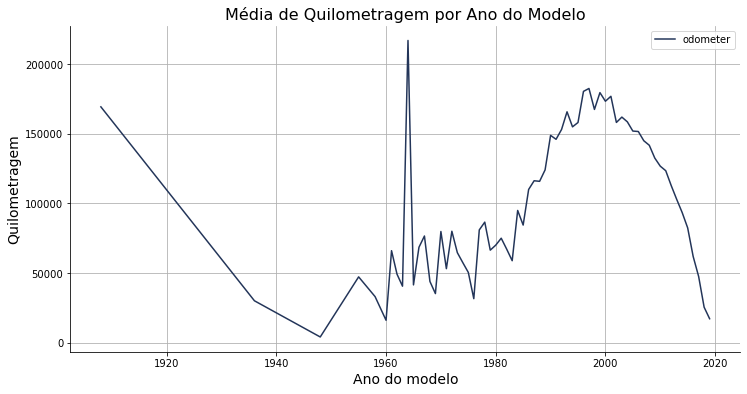

In [33]:
# Gráfico de quilometragem média
data.pivot_table(index='model_year', values='odometer', aggfunc='mean').plot(grid=True, figsize=(12, 6), color='#233559')
plt.title("Média de Quilometragem por Ano do Modelo", fontsize=16)
plt.ylabel('Quilometragem', fontsize=14)
plt.xlabel('Ano do modelo', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Não podemos afirmar que quanto mais velho o carro maior a quilometragem, através do gráfico acima podemos observar que os carros com maior quilometragem são aqueles com ano do modelo próximo a 2000. No gráfico de caixa vemos a presença de valores atípicos que ntambém contrariam nossa afirmação inicial.

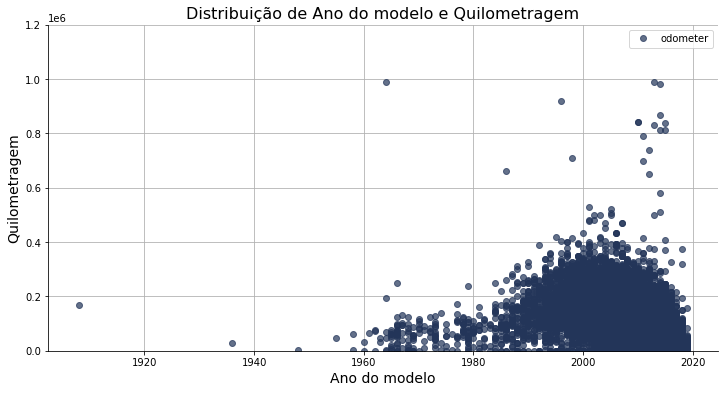

In [34]:
# Distribuição dos valores em odometer
data.plot(x='model_year', y='odometer', 
            ylim=(0, 1200000), style='o', grid=True, figsize=(12, 6), alpha=0.7, color='#233559')
plt.title("Distribuição de Ano do modelo e Quilometragem", fontsize=16)
plt.ylabel('Quilometragem', fontsize=14)
plt.xlabel('Ano do modelo', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Com o gráfico acima podemos visulaizar a presença de dados atípicos (alta quilometragem, e muito antigo) esses devem ser tratados adequadamente, também podemos observar uma concentração dos valores em uma determinada região do gráfico. 

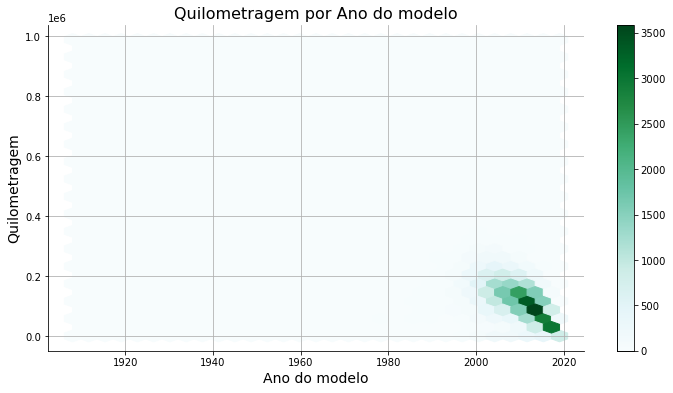

In [35]:
# Distribuição dos valores em odometer
df.plot(x='model_year', y='odometer', kind='hexbin', sharex=False, grid=True, gridsize=30, figsize=(12, 6)) 

plt.title("Quilometragem por Ano do modelo", fontsize=16)
plt.ylabel('Quilometragem', fontsize=14)
plt.xlabel('Ano do modelo', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
A maior quantidade de dados tem o ano do modelo entre 2000 e 2020 e não possuem valores altos de quilometragem.
    
A coluna <b>odometer</b> possui muitos valores atípicos (valores muito altos), iremos investigar para tentar encontrar os responsáveis por esses valores atípicos, acredito que possa estar relacionado com o tipo de veículo. Acredito que veículos como ônibus e caminhões são mais utilizados do que SUV's por exemplo. Se isso se confirmar irei agrupar os dados por <b>type</b> para calcular os valores que irão subistituir os valores ausentes em <b>odometer</b>.

Com os gráficos acima afastamos a hipótese que quanto mais velho o veículo maior a quilometragem.

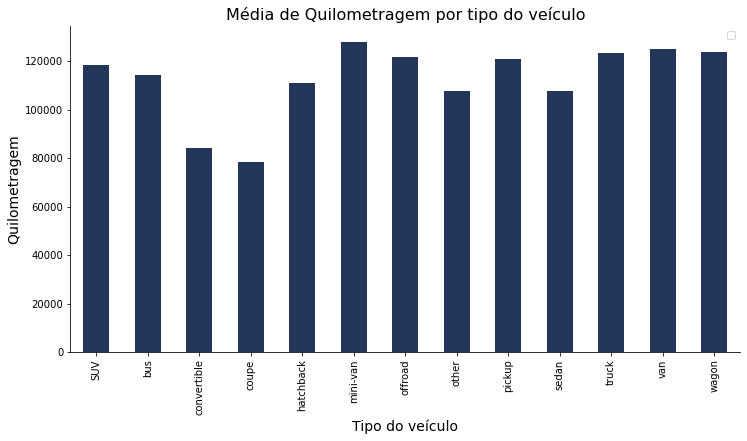

In [36]:
# Gráfico de quilometragem por tipo de veículo
data.pivot_table(
    index='type', values='odometer', aggfunc='mean').plot(kind='bar', figsize=(12,6), color='#233559')
plt.legend('')
plt.title("Média de Quilometragem por tipo do veículo", fontsize=16)
plt.ylabel('Quilometragem', fontsize=14)
plt.xlabel('Tipo do veículo', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Não é possível afirmar que um tipo específico de veículo sejá o principal responsável pelos valores atípicos em quilometragem como a hipótese que levantamos.

In [37]:
data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.421292,0.297083,-0.420192,0.315468,-0.000527
model_year,0.421292,1.000000,-0.151210,-0.469514,0.037455,-0.004564
cylinders,0.297083,-0.151210,1.000000,0.091447,0.404492,0.004283
odometer,-0.420192,-0.469514,0.091447,1.000000,0.036232,0.003791
is_4wd,0.315468,0.037455,0.404492,0.036232,1.000000,0.002229
days_listed,-0.000527,-0.004564,0.004283,0.003791,0.002229,1.000000


<font face='Calibri' color="#001A56" size=+0.8>
Os principais fatores quantitivos que tem correlação com a quilometragem é o ano do modelo, mas já vimos anteriormente que esse parâmetro tem uma certa inconsistência, agora iremos verificar a correlação com a condição do veículo.

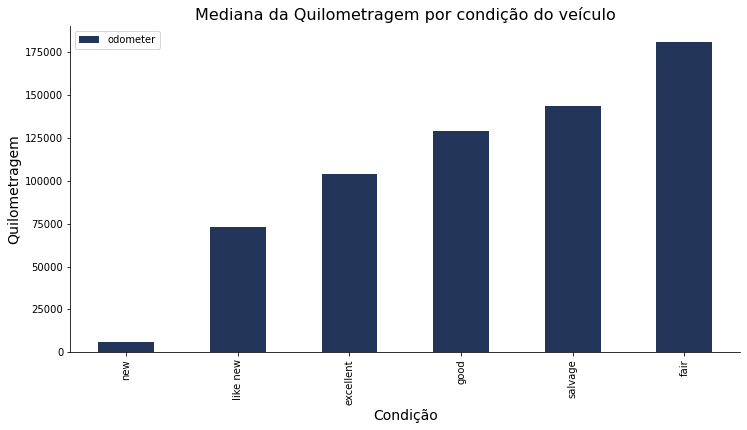

In [38]:
# Gráfico de quilometragem agrupados por condições.
data.pivot_table(
    index='condition', values='odometer', aggfunc='median').sort_values(
    by='odometer', ascending=True).plot(kind='bar', figsize=(12,6), grid=False, color='#233559')

plt.title("Mediana da Quilometragem por condição do veículo", fontsize=16)
plt.ylabel('Quilometragem', fontsize=14)
plt.xlabel('Condição', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Aparentemente a quilometragem tem maior correlação com as condições do veículo.
Iremos agrupar os veículos por condições para calcular a mediana que irá substituir os valores ausentes em <b>odometer</b>, optamos pela mediana para diminuir a interferência dos valores atípicos.

In [39]:
# Calculando a mediana dos grupos
data.groupby('condition')['odometer'].median().sort_values(ascending=True)

condition
new            6000.0
like new      73000.0
excellent    104203.0
good         129000.0
salvage      143347.0
fair         181113.0
Name: odometer, dtype: float64

In [40]:
# Preenchendo os valores ausentes em 'odometer'
data['odometer'].fillna(data.groupby('condition')['odometer'].transform('median'), inplace=True)

# Exibindo as informações da tabela
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51481 entries, 0 to 51480
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51481 non-null  int64  
 1   model_year    51481 non-null  int32  
 2   model         51481 non-null  object 
 3   condition     51481 non-null  object 
 4   cylinders     51481 non-null  int32  
 5   fuel          51481 non-null  object 
 6   odometer      51481 non-null  float64
 7   transmission  51481 non-null  object 
 8   type          51481 non-null  object 
 9   paint_color   51481 non-null  object 
 10  is_4wd        51481 non-null  int64  
 11  date_posted   51481 non-null  object 
 12  days_listed   51481 non-null  int64  
dtypes: float64(1), int32(2), int64(3), object(7)
memory usage: 4.7+ MB


<font face='Calibri' color="#001A56" size=+0.8>
Os valores ausentes foram completamente preenchidos, agora todas as colunas estão completas. Verificaremos agora se a distribuição dos valores de <b>odometer</b> se mantiveram semelhantes a inicial.

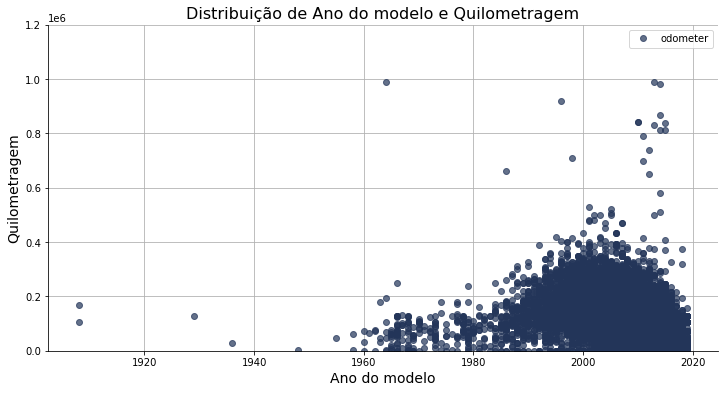

In [41]:
# Gráfico de distribuição
data.plot(x='model_year', y='odometer', 
            ylim=(0, 1200000), style='o', grid=True, figsize=(12, 6), alpha=0.7, color='#233559')

plt.title("Distribuição de Ano do modelo e Quilometragem", fontsize=16)
plt.ylabel('Quilometragem', fontsize=14)
plt.xlabel('Ano do modelo', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Após o preenchimento dos valores ausentes a distribuição se manteve muito semelhante com distribuição inicial, aparentemente não distorcemos os dados.

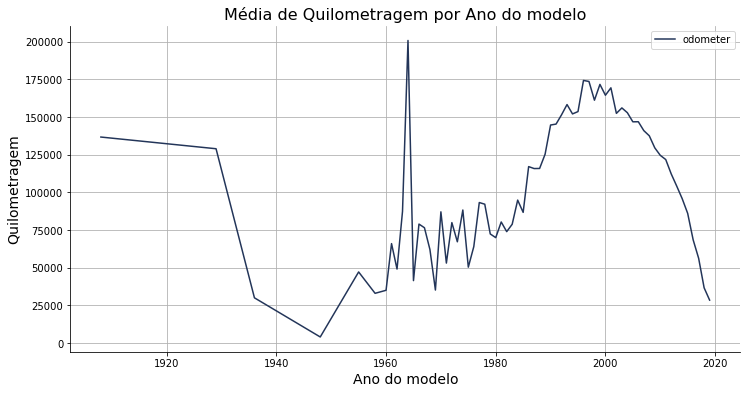

In [42]:
# Gráfico de média
data.pivot_table(index='model_year', values='odometer', aggfunc='mean').plot(grid=True, figsize=(12, 6), color='#233559')

plt.title("Média de Quilometragem por Ano do modelo", fontsize=16)
plt.ylabel('Quilometragem', fontsize=14)
plt.xlabel('Ano do modelo', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
As médias de Quilometragem por ano após o preenchimento dos valores ausentes também se mantiveram semelhantes as médias iniciais.
    
<p>  
    
[Voltar ao Índice](#back)
    
<hr>

<a id='ED'></a>
<h2><font face='Calibri' color="#013294" size=+2.0>
Enriquecendo os dados
        </font></h2>
<p>
<font face='Calibri' color="#001A56" size=+0.8> 
Nesta etapa incluiremos novas colunas com informações que já possuímos implcitamente em nosso DataFrame. Iniciaremos criando uma coluna com a idade do veículo na data que a propagando foi publicadao nome da coluna será <b>age</b>.

In [43]:
# Alterando o tipo dos dados da coluna 'date_posted'
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

# Criando a coluna 'age'
data['age'] = pd.DatetimeIndex(data['date_posted']).year

# Calculando a idade do veículo
data['age'] = data['age'] - data['model_year']

# Exibindo as primeiras linhas
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,7
1,25500,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,10
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,6
3,1500,2003,ford f-150,fair,8,gas,181113.0,automatic,pickup,unknown,0,2019-03-22,9,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2


<font face='Calibri' color="#001A56" size=+0.8>
Criada a coluna 'age' que representa a idade dos veículos na data que foi publicada a propaganda.
    
Agora que temos a idade do veículo iremos criar a coluna <b>km/year</b>, que armazenará a informação da quilometragem média que o veículo percorreu por ano.

In [44]:
# Criando coluna e calculando quilometragem
data['km/year'] = data['odometer'] / data['age']

# Arredondando os valores
data['km/year'] = data['km/year'].round(1)

# Exibindo as informações do DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51481 entries, 0 to 51480
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51481 non-null  int64         
 1   model_year    51481 non-null  int32         
 2   model         51481 non-null  object        
 3   condition     51481 non-null  object        
 4   cylinders     51481 non-null  int32         
 5   fuel          51481 non-null  object        
 6   odometer      51481 non-null  float64       
 7   transmission  51481 non-null  object        
 8   type          51481 non-null  object        
 9   paint_color   51481 non-null  object        
 10  is_4wd        51481 non-null  int64         
 11  date_posted   51481 non-null  datetime64[ns]
 12  days_listed   51481 non-null  int64         
 13  age           51481 non-null  int64         
 14  km/year       51479 non-null  float64       
dtypes: datetime64[ns](1), float64(2), in

<font face='Calibri' color="#001A56" size=+0.8>
Encontramos dois valores ausentes na nova coluna criando, vamos verificar esses dados.

In [45]:
data[data['km/year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,km/year
17017,45400,2018,ram 3500,excellent,6,diesel,0.0,automatic,pickup,black,1,2018-12-16,18,0,NaN
40449,15900,2018,toyota prius,excellent,4,hybrid,0.0,automatic,hatchback,blue,0,2018-07-30,31,0,NaN


<font face='Calibri' color="#001A56" size=+0.8>
Tratam-se de carros que possuem 0 km rodados e por esse motivo não foi possível calcular a quilometragem por ano, o que também é estranho é que não são carros novos, como se trata de apenas 2 registros (menos de 0,01% dos dados) iremos excluílos.

In [46]:
# Excluíndo dados com valores ausentes
data = data.dropna(subset=['km/year']).reset_index(drop=True)

# Exibindo as informações
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51479 entries, 0 to 51478
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51479 non-null  int64         
 1   model_year    51479 non-null  int32         
 2   model         51479 non-null  object        
 3   condition     51479 non-null  object        
 4   cylinders     51479 non-null  int32         
 5   fuel          51479 non-null  object        
 6   odometer      51479 non-null  float64       
 7   transmission  51479 non-null  object        
 8   type          51479 non-null  object        
 9   paint_color   51479 non-null  object        
 10  is_4wd        51479 non-null  int64         
 11  date_posted   51479 non-null  datetime64[ns]
 12  days_listed   51479 non-null  int64         
 13  age           51479 non-null  int64         
 14  km/year       51479 non-null  float64       
dtypes: datetime64[ns](1), float64(2), in

<font face='Calibri' color="#001A56" size=+0.8>
Coluna km/year criada, ela informa a quilometragem por ano dos veículos.
      
<p> 
    
Criaremos também uma coluna, chamada <b>id_condition</b>, que armazenará um número de identificação para a condição do veículo, transformando a informação de categórica para númerica facilitará visualizar correlações e gráficos.

In [47]:
# Criando função para transformação das informações
def identificar_cond (row):
    if row['condition'] == 'new':
        return 5
    elif row['condition'] == 'like new':
        return 4
    elif row['condition'] == 'excellent':
        return 3
    elif row['condition'] == 'good':
        return 2
    elif row['condition'] == 'salvage':
        return 1
    elif row['condition'] == 'fair':
        return 0   
    
# Testando função
identificar_cond(data.iloc[0])

2

In [48]:
# Exibindo informações
data.iloc[0]

price                          9400
model_year                     2011
model                        bmw x5
condition                      good
cylinders                         6
fuel                            gas
odometer                   145000.0
transmission              automatic
type                            SUV
paint_color                 unknown
is_4wd                            1
date_posted     2018-06-23 00:00:00
days_listed                      19
age                               7
km/year                     20714.3
Name: 0, dtype: object

In [49]:
# Criando a nova coluna
data['id_condition'] = data.apply(identificar_cond, axis=1)

# Exibindo as primeiras linhas
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,km/year,id_condition
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,7,20714.3,2
1,25500,2008,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,10,8870.5,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,6,18333.3,4
3,1500,2003,ford f-150,fair,8,gas,181113.0,automatic,pickup,unknown,0,2019-03-22,9,16,11319.6,0
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2,40451.5,3


In [50]:
# Exibindo informações
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51479 entries, 0 to 51478
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51479 non-null  int64         
 1   model_year    51479 non-null  int32         
 2   model         51479 non-null  object        
 3   condition     51479 non-null  object        
 4   cylinders     51479 non-null  int32         
 5   fuel          51479 non-null  object        
 6   odometer      51479 non-null  float64       
 7   transmission  51479 non-null  object        
 8   type          51479 non-null  object        
 9   paint_color   51479 non-null  object        
 10  is_4wd        51479 non-null  int64         
 11  date_posted   51479 non-null  datetime64[ns]
 12  days_listed   51479 non-null  int64         
 13  age           51479 non-null  int64         
 14  km/year       51479 non-null  float64       
 15  id_condition  51479 non-null  int64 

<font face='Calibri' color="#001A56" size=+0.8>
Foram acrescentadas duas colunas a tabela com as informações de idade do veículo quando foi postada a propaganda (<b>age</b>) e a quilometragem por ano(<b>km/year</b>).

Também acrescentei um coluna de identificação para as condições dos veículos utilizando números (<b>id_condition</b>) para facilitar quando fizer os gráficos e correlações.
<p>    
    
[Voltar ao Índice](#back)

<hr>

<a id='EAD'></a>
<h2><font face='Calibri' color="#001A56" size=+3.0>
Análise exploratória de dados
    </font></h2>
    <p>
    
<a id='01'></a>
<h3><font face='Calibri' color="#013294" size=+2.0>
Análise inicial dos parâmetros.
    </font></h3>
<p>
<font face='Calibri' color="#001A56" size=+0.8> 
Nessa etapa conheceremos melhor as características dos seguintes parâmetros.
<ul>
<li>Preço.
<li>A idade do veículo quando a propaganda foi colocada.
<li>Quilometragem.
<li>Número de cilindros.
<li>Condição
    </ul> 


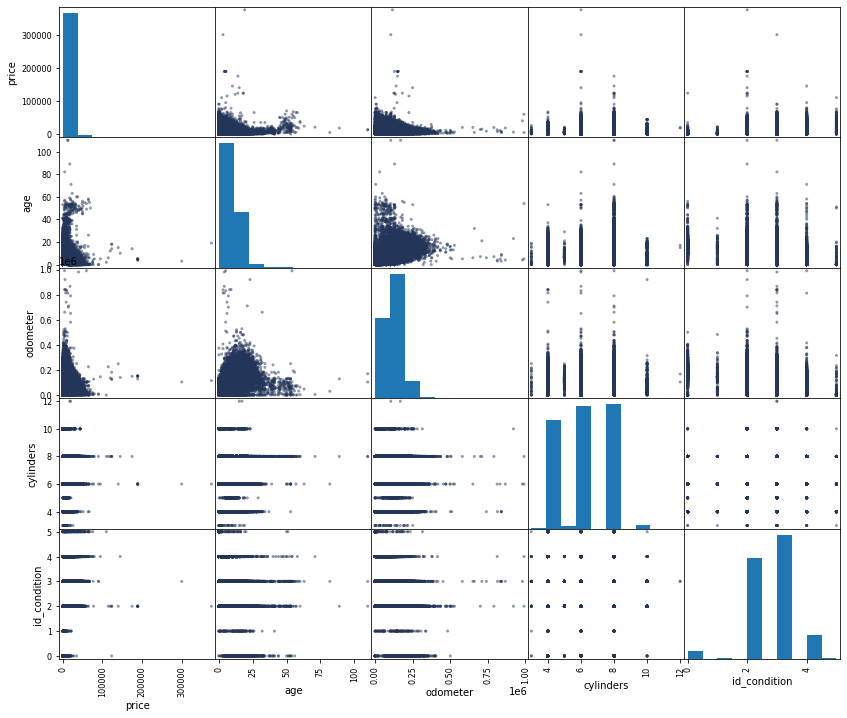

In [51]:
# Selecionando as colunas
parametros = data[['price', 'age', 'odometer', 'cylinders', 'id_condition']]

# Plotando gráfico
pd.plotting.scatter_matrix(parametros, figsize=(14, 12), color='#233559')
_ = plt.title('')

<font face='Calibri' color="#001A56" size=+0.8>
    Os valores atípicos em preço, idade e quilometragem, são os que mais afetam os demais parâmetros, o ideal seria excluí-los.

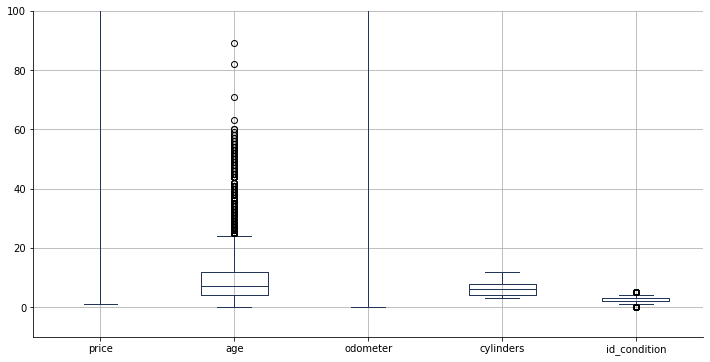

In [52]:
parametros.boxplot(figsize=(12,6), color='#233559')
plt.title("Distribuição dos valores nas colunas", fontsize=16)
sns.despine()
plt.ylim(-10, 100)
_ = plt.title('')

<font face='Calibri' color="#001A56" size=+0.8> 
De fato temos valores atípicos (muito altos) em <b>age</b> como mostra o gráfico acima.

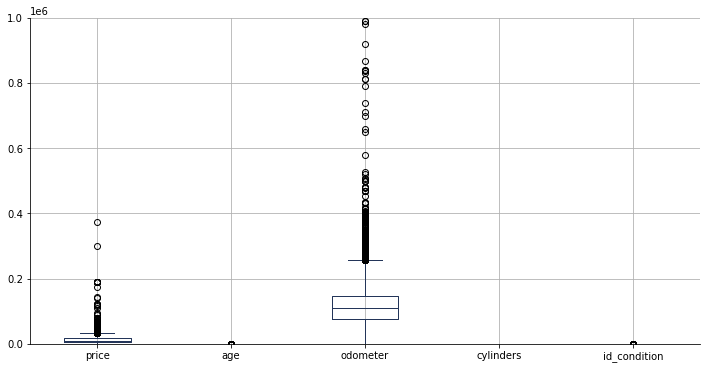

In [53]:
parametros.boxplot(figsize=(12,6), color='#233559')
plt.title("Distribuição dos valores nas colunas", fontsize=16)
sns.despine()
plt.ylim(-10, 1000000)
_ = plt.title('')

<font face='Calibri' color="#001A56" size=+0.8> 
Nesse gráfico observamos a presença de valores atípicos(muito altos) em <b>price</b> e <b>odometer</b>.

In [54]:
# Correlação entre as colunas
parametros.corr()

,price,age,odometer,cylinders,id_condition
price,1.000000,-0.419998,-0.393319,0.297134,0.230432
age,-0.419998,1.000000,0.443098,0.150858,-0.309510
odometer,-0.393319,0.443098,1.000000,0.086840,-0.331770
cylinders,0.297134,0.150858,0.086840,1.000000,-0.068388
id_condition,0.230432,-0.309510,-0.331770,-0.068388,1.000000


<font face='Calibri' color="#001A56" size=+0.8> 
Os parâmetros que possuem valores atípicos que afetam os dados são: preço, quilometragem e idade. Os demais parâmetros são números "pré-determinados" por esse motivo não temos valores atípicos.
    
[Voltar ao Índice](#back)

<a id='02'></a>
<h3><font face='Calibri' color="#013294" size=+2.0>
Tratando os valores atípicos.
    </font></h3>
<p>
<font face='Calibri' color="#001A56" size=+0.8> 
Agora iremos definir os valores limites dos parâmetros que possuem valores atípicos para que então possamos filtrar os dados excluindo esses valores.

In [55]:
# Calculando outlier inferior de odometer
Q1_odometer = data['odometer'].quantile(0.25)
Q3_odometer = data['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
lim_inf_odometer_va = Q1_odometer - (1.5*IQR_odometer)

print('Outlier inferior odometer:', lim_inf_odometer_va)

Outlier inferior odometer: -32653.25


In [56]:
# Calculando outlier inferior de price
Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lim_inf_price_va = Q1_price - (1.5*IQR_price)

print('Outlier inferior price:', lim_inf_price_va)

Outlier inferior price: -12808.75


In [57]:
# Calculando outlier inferior de age
Q1_age = data['age'].quantile(0.25)
Q3_age = data['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lim_inf_age_va = Q1_age - (1.5*IQR_age)

print('Outlier inferior age:', lim_inf_age_va)

Outlier inferior age: -8.0


In [58]:
# Calculando outlier superior de odometer
Q1_odometer = data['odometer'].quantile(0.25)
Q3_odometer = data['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
lim_sup_odometer_va = Q3_odometer + (1.5*IQR_odometer)

print('Outlier superior odometer:', lim_sup_odometer_va)

Outlier superior odometer: 256068.75


In [59]:
# Calculando outlier superior de price
Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lim_sup_price_va = Q3_price + (1.5*IQR_price)

print('Outlier superior price:', lim_sup_price_va)

Outlier superior price: 34681.25


In [60]:
# Calculando outlier superior de age
Q1_age = data['age'].quantile(0.25)
Q3_age = data['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lim_sup_age_va = Q3_age + (1.5*IQR_age)

print('Outlier superior age:', lim_sup_age_va)

Outlier superior age: 24.0


In [61]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,age,km/year,id_condition
count,51479.000000,51479.000000,51479.000000,51479.000000,51479.000000,51479.000000,51479.000000,51479.0,51479.000000
mean,12133.192642,2009.792925,6.119874,115191.203675,0.496377,39.551778,8.514462,inf,2.608637
std,10034.706349,6.108853,1.657590,60464.220306,0.499992,28.197087,6.122173,NaN,0.793396
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,5000.000000,2006.000000,4.000000,75617.500000,0.000000,19.000000,4.000000,10615.4,2.000000
50%,9000.000000,2011.000000,6.000000,110895.000000,0.000000,33.000000,7.000000,15272.7,3.000000
75%,16872.500000,2014.000000,8.000000,147798.000000,1.000000,53.000000,12.000000,22915.1,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000,110.000000,inf,5.000000


<font face='Calibri' color="#001A56" size=+0.8> 
Agora iremos filtrar os dados para que sejam eliminados os outliers superior da coluna <b>price</b>.

In [62]:
#Filtrando os dados
data_filter_price = data.loc[data['price'] <= 34702.5]

# Checando se os outliers foram eliminados.
data_filter_price.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,age,km/year,id_condition
count,49849.000000,49849.000000,49849.000000,49849.000000,49849.000000,49849.000000,49849.000000,49849.0,49849.000000
mean,11104.567735,2009.614897,6.079941,117171.583081,0.484343,39.548055,8.692511,inf,2.590804
std,7814.930388,5.995880,1.659283,59682.405208,0.499760,28.201756,6.009406,NaN,0.789252
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4995.000000,2006.000000,4.000000,79500.000000,0.000000,19.000000,4.000000,10527.1,2.000000
50%,8990.000000,2011.000000,6.000000,113324.000000,0.000000,33.000000,8.000000,15075.3,3.000000
75%,15900.000000,2014.000000,8.000000,149328.000000,1.000000,53.000000,12.000000,22235.7,3.000000
max,34700.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000,110.000000,inf,5.000000


<font face='Calibri' color="#001A56" size=+0.8>
Agora iremos filtrar os dados para que sejam eliminados os outliers superior em <b>odometer</b>.

In [63]:
#Filtrando os dados
data_filter_price_odometer = data_filter_price.loc[data['odometer'] <= 256083.0]

# Checando se os outliers foram eliminados.
data_filter_price_odometer.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,age,km/year,id_condition
count,48929.000000,48929.000000,48929.000000,48929.000000,48929.000000,48929.000000,48929.000000,48929.0,48929.000000
mean,11199.599542,2009.734759,6.067874,113633.183920,0.483006,39.556235,8.572544,inf,2.604202
std,7832.194843,5.947781,1.658556,53261.253279,0.499716,28.218638,5.961066,NaN,0.777943
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4999.000000,2006.000000,4.000000,78300.000000,0.000000,19.000000,4.000000,10438.1,2.000000
50%,8995.000000,2011.000000,6.000000,111846.000000,0.000000,33.000000,8.000000,14974.3,3.000000
75%,15990.000000,2014.000000,8.000000,146062.000000,1.000000,53.000000,12.000000,22138.0,3.000000
max,34700.000000,2019.000000,12.000000,256000.000000,1.000000,271.000000,110.000000,inf,5.000000


<font face='Calibri' color="#001A56" size=+0.8>
Por último iremos filtrar os dados para que sejam eliminados os outliers superior em <b>age</b>.

In [64]:
#Filtrando os dados
data_filter_all = data_filter_price_odometer.loc[data['age'] <= 24]

# Checando se os outliers foram eliminados.
data_filter_all.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,age,km/year,id_condition
count,48264.000000,48264.000000,48264.000000,48264.000000,48264.000000,48264.000000,48264.000000,48264.00,48264.000000
mean,11245.404504,2010.078734,6.051798,113681.008930,0.485061,39.543697,8.228100,inf,2.611180
std,7836.977532,5.074757,1.656858,53138.782787,0.499782,28.216022,5.088236,NaN,0.771026
min,1.000000,1994.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
25%,5000.000000,2007.000000,4.000000,78633.000000,0.000000,19.000000,4.000000,10653.70,2.000000
50%,8995.000000,2011.000000,6.000000,111912.000000,0.000000,33.000000,7.000000,15092.80,3.000000
75%,15990.000000,2014.000000,8.000000,146000.000000,1.000000,53.000000,12.000000,22282.35,3.000000
max,34700.000000,2019.000000,12.000000,256000.000000,1.000000,271.000000,24.000000,inf,5.000000


<font face='Calibri' color="#001A56" size=+0.8>
Os dados foram filtrados, o próximo passo será checar como ficou a distribuição dos dados após a exclusão dos outliers.
    
<p>    
    
[Voltar ao Índice](#back)

<a id='03'></a>
<h3><font face='Calibri' color="#013294" size=+2.0>
Análise dos parâmetros após exclusão de valores atípicos.
    </font></h3>
<p>
<font face='Calibri' color="#001A56" size=+0.8> 
Começaremos analisando a distribuição dos preços.
<ul>

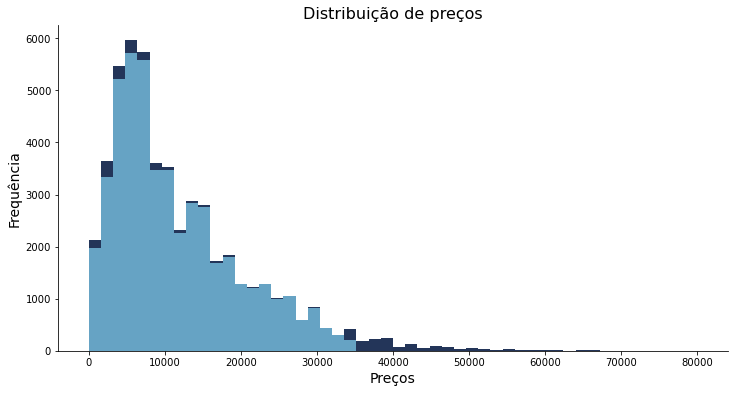

In [65]:
# Gráfico com dados iniciais
data['price'].hist(range=(0, 80000), bins=50, figsize=(12, 9), color='#233559', grid=False)
# Gráfico com dados filtrados
data_filter_all['price'].hist(range=(0, 80000), bins=50, figsize=(12,6),  color='#78c0e0', alpha=0.8, grid=False)

plt.title('Distribuição de preços', fontsize=16)
plt.ylabel('Frequência', fontsize=14)
plt.xlabel('Preços', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
A distribuição dos dados da tabela filtrada ficou muito parecida com a tabela original, agora não temos valores maiores de 34.700, valor esse que foi definido como limite superior para exclusão de valores atípicos. Os valores filtrados também mantiveram uma frequência bem parecida com os dados originais, claro que um pouco abaixo pois também houveram exclusões de dados devido aos outros parâmetros como idade e quilometragem dos veículos.

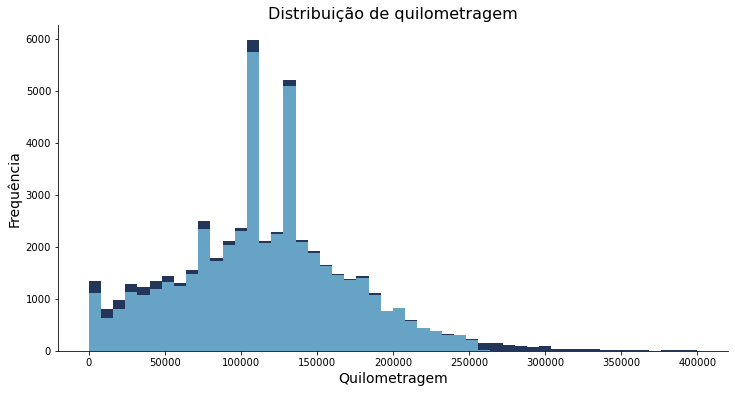

In [66]:
# Gráfico com dados iniciais
data['odometer'].hist(range=(0, 400000), bins=50, figsize=(12, 6), color='#233559', grid=False)
# Gráfico com dados filtrados
data_filter_all['odometer'].hist(range=(0, 400000), bins=50, figsize=(12, 6), color='#78c0e0', alpha=0.8, grid=False)

plt.title('Distribuição de quilometragem', fontsize=16)
plt.ylabel('Frequência', fontsize=14)
plt.xlabel('Quilometragem', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Nesse caso a tabela filtrada também manteve um comportamento parecido com a tabela original, foram excluídos todos os valores acima de 256.000 (limite superior, para exclusão de valores atípicos). A frequência também se manteve parecida com os dados originais, um pouco abaixo pelas exclusões de dados devido aos outros parâmetros.

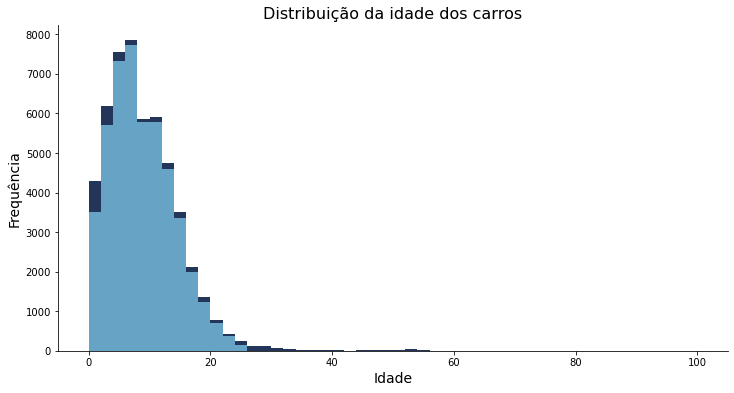

In [67]:
# Gráfico com dados iniciais
data['age'].hist(range=(0, 100), bins=50, figsize=(12, 6), color='#233559', grid=False)
# Gráfico com dados filtrados
data_filter_all['age'].hist(range=(0, 100), bins=50, figsize=(12, 6), color='#78c0e0', alpha=0.8, grid=False)

plt.title('Distribuição da idade dos carros', fontsize=16)
plt.ylabel('Frequência', fontsize=14)
plt.xlabel('Idade', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Na distribuição das idades a tabela filtrada também manteve um comportamento parecido com a tabela original assim como nos casos anteriores, foram excluídos os valores acima de 24 por serem considerados atípicos. O mesmo ocorreu com a frequência, mantendo-se parecida com os dados originais.

In [68]:
# Quantidade de dados mantidos após filtro
len(data_filter_all)/len(data)

0.9375473494046116

<font face='Calibri' color="#001A56" size=+0.8>
    Com a exclusão dos valores atípicos em <b>price</b>, <b>odometer</b> e <b>age</b> tivemos redução de aproximadamente 7% dos dados. Restando ainda uma boa quantidade de dados.
    
<p>
    
[Voltar ao Índice](#back)

<a id='04'></a>
<h3><font face='Calibri' color="#013294" size=+2.0>
Tempo de vida das propagandas
    </font></h3>
<p>
<font face='Calibri' color="#001A56" size=+0.8> 
Analisaremos agora por quanto tempo as propagandas permanecem no site.
<ul>

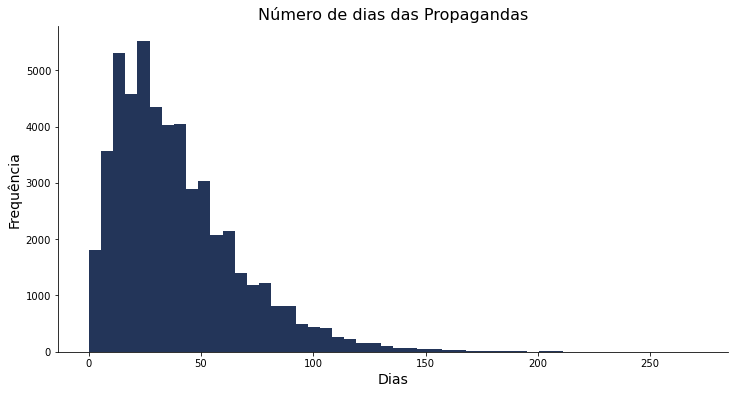

In [69]:
# Plotando o histograma
data['days_listed'].hist(bins=50, figsize=(12, 6), color='#233559', grid=False)
plt.title('Número de dias das Propagandas', fontsize=16)
plt.ylabel('Frequência', fontsize=14)
plt.xlabel('Dias', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
    Conforme o gráfico acima mostra, as propagandas costumam ficar ativas até 50 dias com mais frequência, mas podemos observar também que os dados são desbalanceados nesse parâmetro, tendo propagandas que ficam ativas por um período excessivamente longo, ultrapassando 200 dias.

In [70]:
# Média de dias das propagandas ativas
data['days_listed'].mean()

39.55177839507372

In [71]:
# Mediana de dias das propagandas ativas
data['days_listed'].median()

33.0

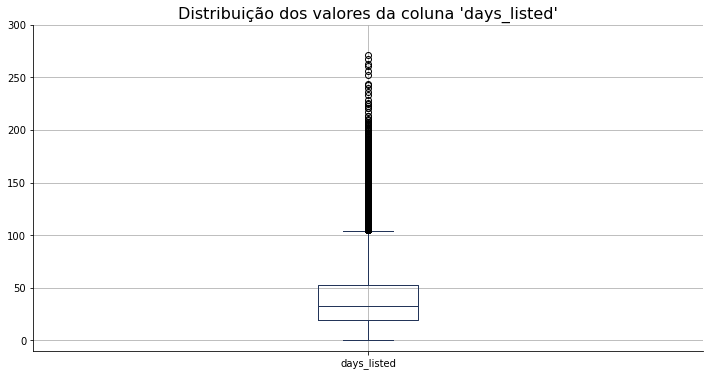

In [72]:
# Plotando o gráfico de caixa
data[['days_listed']].boxplot(figsize=(12, 6), color='#233559')
plt.title("Distribuição dos valores da coluna 'days_listed'", fontsize=16)
plt.ylim(-10, 300)
sns.despine()


<font face='Calibri' color="#001A56" size=+0.8>
    Com esse gráfico de caixa podemos observar a presença de vários valores atípicos acima dos 100 dias.

In [73]:
data['days_listed'].describe()

count    51479.000000
mean        39.551778
std         28.197087
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<font face='Calibri' color="#001A56" size=+0.8>
    A maior parte dos dados tem menos de 53 dias de propaganda ativas, porém o valor máximo é 271 dias, excessivamente maior que a maioria dos dados o que comprova a presença de valores atipicos.

In [74]:
# Definindo os limites para valores atípicos em days_listed
Q1_days = data['days_listed'].quantile(0.25)
Q3_days = data['days_listed'].quantile(0.75)
IQR_days = Q3_days - Q1_days
lim_inf_days_va = Q1_days - (1.5*IQR_days)
lim_sup_days_va = Q3_days + (1.5*IQR_days)
print('Outlier inferior days:', lim_inf_days_va)
print('Outlier superior days:', lim_sup_days_va)

Outlier inferior days: -32.0
Outlier superior days: 104.0


In [75]:
# Filtrando dados
data_days_listed = data.query('days_listed <= 104')

# Descrição dos dados após filtro
data_days_listed['days_listed'].describe()

count    49865.000000
mean        36.674060
std         23.185785
min          0.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        104.000000
Name: days_listed, dtype: float64

<font face='Calibri' color="#001A56" size=+0.8>
Considerando todos os dados, a média e a mediana dos dias que as propagandas foram exibidas foram:
<ul>    
<li>Média: 39,5
<li>Mediana: 33
    </ul>
Porém nessa coluna temos presença de muitos valores atípicos, após a remoção desses valores é possível concluir que o tempo de vida útil comum de uma propaganda é de aproximadamente 36 dias.

As propagandas removidas mais rapidamente, foram removidas com menos de 24 horas (0 dias). Já aquelas que permanecereram por um tempo anormalmente longo foram aquelas que ficaram por mais de 104 dias.
    
<p>
    
[Voltar ao Índice](#back)

<a id='05'></a>
<h3><font face='Calibri' color="#013294" size=+2.0>
Média de preços dos diferentes tipos de veículos
    </font></h3>
<p>
<font face='Calibri' color="#001A56" size=+0.8> 
Analisaremos agora número de propagandas e o preço médio para cada tipo de veículo.
<ul>

In [76]:
# Contado as propagandas
count_days = data_filter_all.pivot_table(index='type', values='days_listed', aggfunc='count')

# Média de preços
mean_price = data_filter_all.pivot_table(index='type', values='price')

# Juntando as informações
days_price = count_days.join(mean_price).sort_values(by='days_listed', ascending=False)

# Exibindo a tabela
days_price.head(20)

,days_listed,price
type,,
sedan,12003,6981.055819
SUV,11879,10472.956309
truck,11068,15165.444615
pickup,6274,15092.206726
coupe,2024,13494.036067
wagon,1500,8996.340667
mini-van,1140,8066.547368
hatchback,1005,6833.473632
van,578,8889.480969


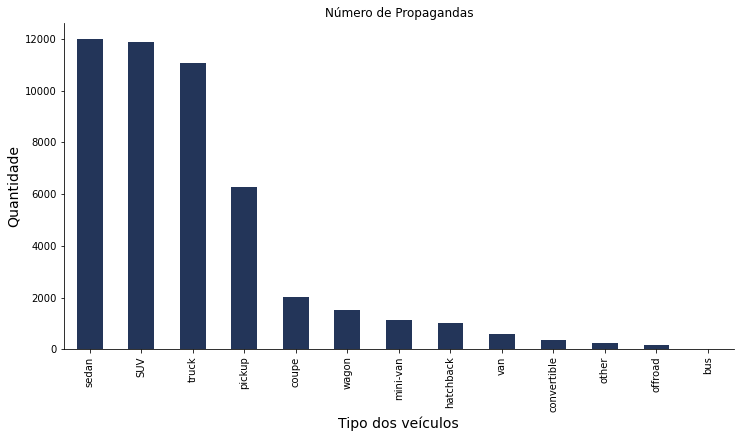

In [77]:
# Plotando o gráfico com número de propagandas
data_filter_all.groupby('type')['days_listed'].count().sort_values(ascending=False).plot(
    kind='bar', figsize=(12, 6), color='#233559', grid=False)
plt.title('Número de Propagandas')
plt.ylabel('Quantidade', fontsize=14)
plt.xlabel('Tipo dos veículos', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
    Os tipos de carro com a maior quantidade de propagandas foram os sedans, SUV's e caminhões. Logo, os que tiveram menor quantidade de propagandas foram os offroad's e ônibus.

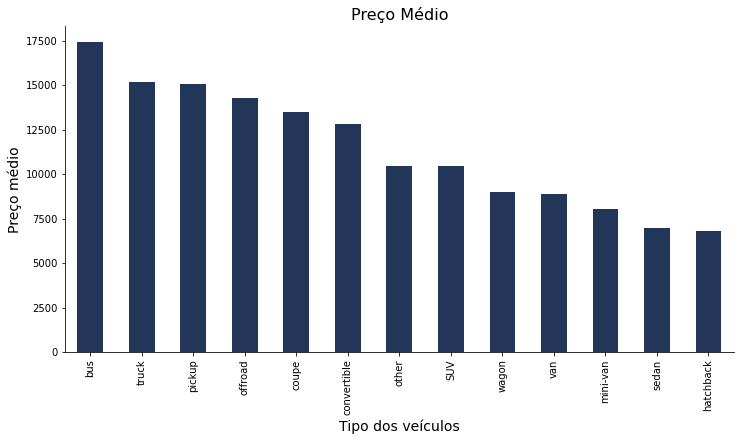

In [78]:
# Gráfico de média de preços de cada tipo
data_filter_all.groupby('type')['price'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(12, 6), color='#233559', grid=False)
plt.title('Preço Médio', fontsize=16)
plt.ylabel('Preço médio', fontsize=14)
plt.xlabel('Tipo dos veículos', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
    As maiores média de preços pertencem aos ônibus, em seguida caminhões e pickup's. Os sedans, embora tenham muitas propagandas, tem o preço médio entre os mais baixos.
    
<p>
    
Os dois tipos com os maiores números de propagandas são Sedan e SUV, iremos separa-los e um novo DataFrame.

In [79]:
# Filtrando os dados
top_listed = data_filter_all.query('type == "sedan" or type == "SUV"').reset_index(drop=True)

# Exibindo as primeiras linhas
top_listed.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,km/year,id_condition
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,7,20714.3,2
1,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,6,18333.3,4
2,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2,40451.5,3
3,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,4,14488.5,3
4,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,26404.0,3


In [80]:
# Exibindo informações
top_listed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23882 entries, 0 to 23881
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         23882 non-null  int64         
 1   model_year    23882 non-null  int32         
 2   model         23882 non-null  object        
 3   condition     23882 non-null  object        
 4   cylinders     23882 non-null  int32         
 5   fuel          23882 non-null  object        
 6   odometer      23882 non-null  float64       
 7   transmission  23882 non-null  object        
 8   type          23882 non-null  object        
 9   paint_color   23882 non-null  object        
 10  is_4wd        23882 non-null  int64         
 11  date_posted   23882 non-null  datetime64[ns]
 12  days_listed   23882 non-null  int64         
 13  age           23882 non-null  int64         
 14  km/year       23882 non-null  float64       
 15  id_condition  23882 non-null  int64 

In [81]:
# Descrição dos dados.
top_listed.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,age,km/year,id_condition
count,23882.000000,23882.000000,23882.000000,23882.000000,23882.00000,23882.000000,23882.000000,23882.0,23882.000000
mean,8717.940750,2010.365212,5.204171,111641.065279,0.37522,39.584792,7.942425,inf,2.680094
std,6115.082367,4.765400,1.393490,50830.588836,0.48419,28.224051,4.780951,NaN,0.757966
min,1.000000,1994.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
25%,4495.000000,2007.000000,4.000000,78950.500000,0.00000,19.000000,4.000000,11000.0,2.000000
50%,6995.000000,2011.000000,4.000000,108000.000000,0.00000,33.000000,7.000000,15250.0,3.000000
75%,11895.000000,2014.000000,6.000000,142000.000000,1.00000,53.000000,11.000000,21912.1,3.000000
max,34700.000000,2019.000000,10.000000,256000.000000,1.00000,271.000000,24.000000,inf,5.000000


<font face='Calibri' color="#001A56" size=+0.8>
    Os tipos de carros com maiores números de propagandas são Sedan e SUV. Os carros com maiores médias de preços são ônibus, caminhões e pickup's.
        
<p>
    
[Voltar ao Índice](#back)

<a id='06'></a>
<h3><font face='Calibri' color="#013294" size=+2.0>
Fatores de preço
    </font></h3>
<p>
<font face='Calibri' color="#001A56" size=+0.8> 
Para descobrir quais fatores impactam no preço dos veículos iremos analisar primeiro se há alguma correlação entre eles e depois analisa-los individualmente.

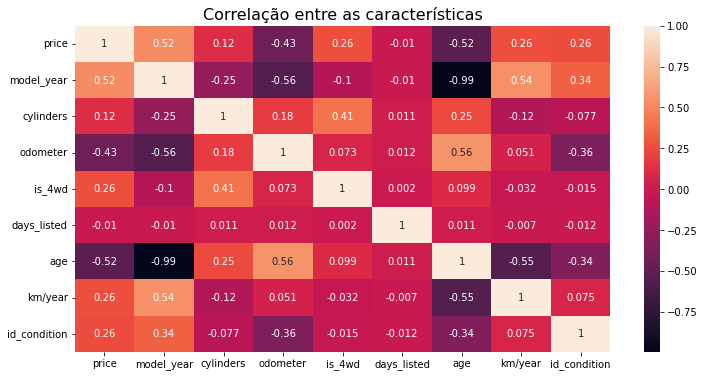

In [82]:
plt.subplots(figsize=(12, 6))
sns.heatmap(top_listed.corr().round(3), annot=True)
_ = plt.title("Correlação entre as características", fontsize=16)

<font face='Calibri' color="#001A56" size=+0.8>
    A idade é o fator que tem maior interferência no preço, irei começar por ele, traçando o preço médio por idade.
    
<a id='f1'></a>
<h4><font face='Calibri' color="#1E90B6" size=+2.0>
Idade
</font></h4>

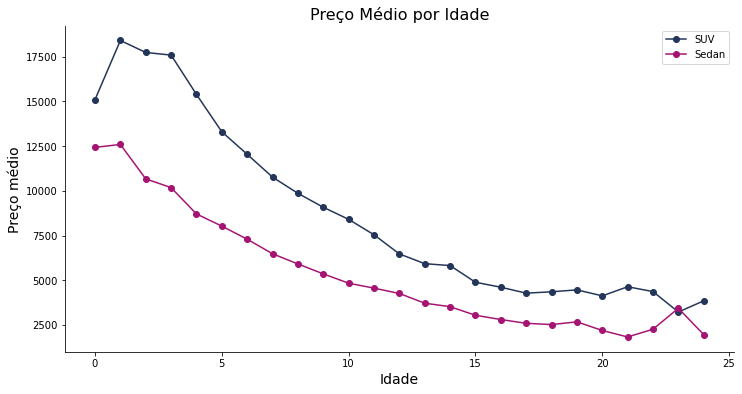

In [83]:
# Plotando o gráfico.
ax = plt.subplot(111)
top_listed.query('type == "SUV"').groupby('age')['price'].mean().plot(ax=ax, style='-o', grid=False, figsize=(12, 6), label='SUV', color='#233559')
top_listed.query('type == "sedan"').groupby('age')['price'].mean().plot(ax=ax, style='-o', grid=False, figsize=(12, 6), label='Sedan', color='#A61473')
plt.legend()
_ = plt.title('Preço Médio por Idade', fontsize=16)
plt.ylabel('Preço médio', fontsize=14)
plt.xlabel('Idade', fontsize=14)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Com o gráfico fica clara a diminuição do preço médio dos veículos com o aumento da idade, essa queda parece ser interrompida por volta dos 16 anos, ou seja, podemos concluir que carros desses tipos perdem valor anualmente até os 16 anos. A exceção é em relação ao carros novos, principalmente SUV's, que têm preço menor que carros com 1 ano de idade, uma hipótese para esse caso é que talvez haja algum tipo de estimulo para compra de carros novos.
<p>    
    
Outro ponto nítido é que SUV's tem o preço maior em relação aos sedans.
    </font>
    
<a id='f2'></a>
<h4><font face='Calibri' color="#1E90B6" size=+2.0>
Quilometragem
</font></h4>
    <p>
    <font face='Calibri' color="#001A56" size=+0.8>
        Analisaremos agora a relação entre a quilometragem e o preço.

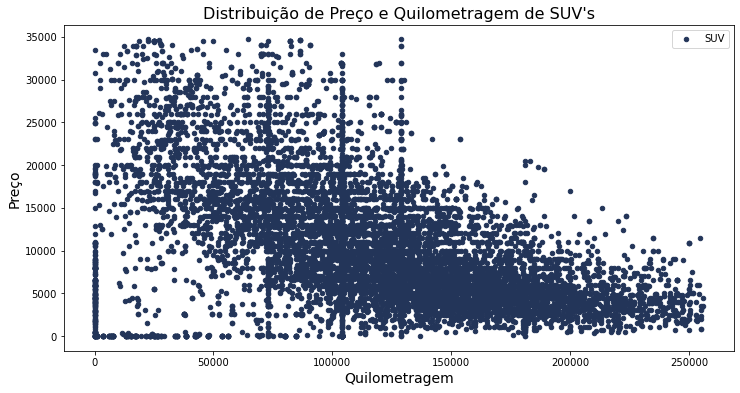

In [84]:
# Plotando o gráfico.
top_listed.query('type == "SUV"').plot(
    figsize=(12, 6), label='SUV', color='#233559', x='odometer', y='price', kind='scatter')
plt.legend()
plt.title("Distribuição de Preço e Quilometragem de SUV's", fontsize=16)
plt.ylabel('Preço', fontsize=14)
_ = plt.xlabel('Quilometragem', fontsize=14)

<font face='Calibri' color="#001A56" size=+0.8>
    Um gráfico de distribuição como esse infelizmente não nos dá uma visão clara de como a quilometragem influência sobre o preço, podemos notar uma queda do preço conforme o aumento da quilometragem, mas se plotarmos junto as informações dos sedans o gráfico fica un tanto quanto abstrato, talvez categorizar a informação de quilometragem possa nos ajudar nessa análise, mas antes observaremos se o mesmo se repete com os sedans.

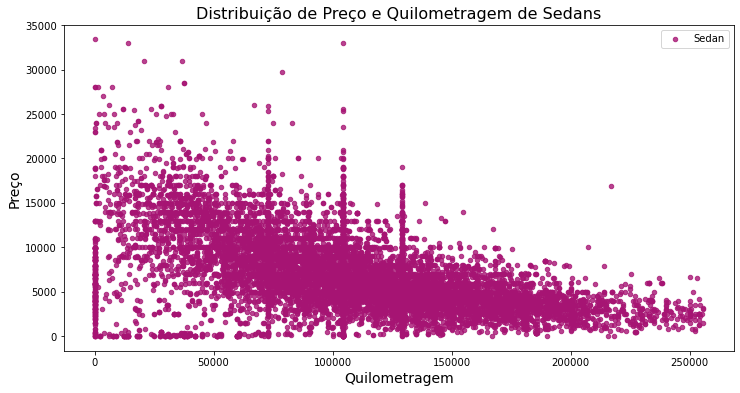

In [85]:
top_listed.query('type == "sedan"').plot(
    figsize=(12, 6), label='Sedan', color='#A61473', x='odometer', y='price', kind='scatter', alpha=0.8)
plt.legend()
plt.title("Distribuição de Preço e Quilometragem de Sedans", fontsize=16)
plt.ylabel('Preço', fontsize=14)
_ = plt.xlabel('Quilometragem', fontsize=14)

<font face='Calibri' color="#001A56" size=+0.8>
É possível observar que há diminuição do preço em função da quilometragem, porém da forma que estão dispostos os dados e gráficos isso não é muito nítido. Para melhorar a visualização iremos categorizar a quilometragem em uma nova coluna.

In [86]:
# Criando uma nova coluna com a classificação da quilometragem.
top_listed['km_class'] = pd.cut(top_listed['odometer'], bins=8)

# Exibindo as primeiras linhas
top_listed.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,km/year,id_condition,km_class
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,7,20714.3,2,"(128000.0, 160000.0]"
1,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,6,18333.3,4,"(96000.0, 128000.0]"
2,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2,40451.5,3,"(64000.0, 96000.0]"
3,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,4,14488.5,3,"(32000.0, 64000.0]"
4,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,3,26404.0,3,"(64000.0, 96000.0]"


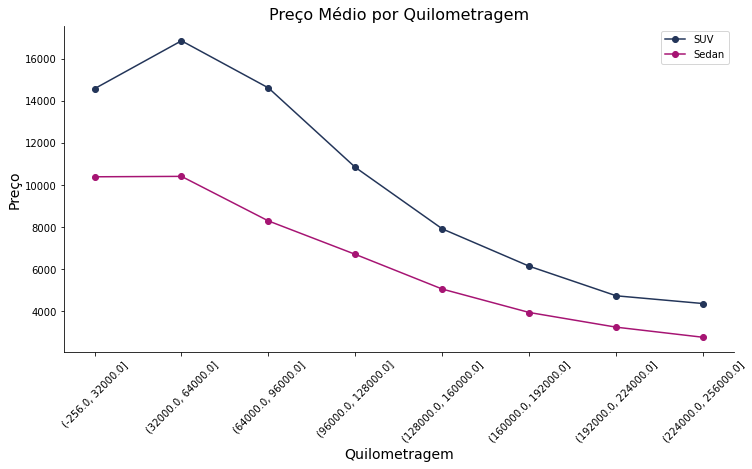

In [87]:
# Plotando gráfico
ax = plt.subplot(111)

top_listed.query(
    'type == "SUV"').groupby(
    'km_class')['price'].mean().plot(
    ax=ax, figsize=(12, 6), label='SUV', color='#233559', style='-o')
top_listed.query(
    'type == "sedan"').groupby(
    'km_class')['price'].mean().plot(
    ax=ax, figsize=(12, 6), label='Sedan', color='#A61473', style='-o')
plt.legend()
plt.title('Preço Médio por Quilometragem', fontsize=16)
plt.ylabel('Preço', fontsize=14)
plt.xlabel('Quilometragem', fontsize=14)
plt.xticks(rotation=45)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Agora ficou mais claro como realmente os preços diminuem em função da quilometragem, assim como observamos quando analisamos a idade versus preço, as SUVs novas são mais baratas que aquelas que já tem uma certa quilometragem, porém dessa vez não observamos o mesmo ocorrer com os sedans.
</font>    
    <a id='f3'></a>
<h4><font face='Calibri' color="#1E90B6" size=+2.0>
Condições
</font></h4><p>
    
<font face='Calibri' color="#001A56" size=+0.8>
    Analisaremos agora o preço em relação as condições dos veículos.

In [88]:
# Agrupando os dados
top_listed.pivot_table(index='type', columns='condition', values='id_condition', aggfunc='count')

condition,excellent,fair,good,like new,new,salvage
type,,,,,,
SUV,6309,279,4173,1088,15,15
sedan,6093,263,4249,1312,45,41


<font face='Calibri' color="#001A56" size=+0.8>
Os automóveis classificados como <b>new</b> e <b>salvage</b> não irão participar da análise pois são amostras pequenas.

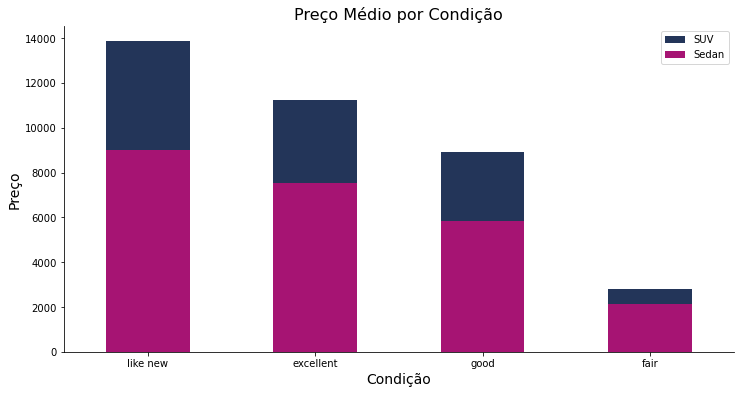

In [89]:
# Plotando o gráfico
ax = plt.subplot(111)

top_listed.query('type == "SUV"').groupby(
    'condition')['price'].mean().reindex(['like new','excellent','good','fair']).plot(
    ax=ax, kind='bar', figsize=(12, 6), label='SUV', color='#233559')
top_listed.query('type == "sedan"').groupby(
    'condition')['price'].mean().reindex(['like new','excellent','good','fair']).plot(
    ax=ax, kind='bar', figsize=(12, 6), label='Sedan', color='#A61473')
plt.legend()
plt.title('Preço Médio por Condição', fontsize=16)
plt.ylabel('Preço', fontsize=14)
plt.xlabel('Condição', fontsize=14)
plt.xticks(rotation=0)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
Como já era de se esperar, a condição do veículo também tem influência sobre o preço, afinal ninguém pagaria mais caro por uma sucata do que por um carro novo. Um carro que parece novo pode custar até 3 vezes mais que um razoável.
</font>    
    <a id='f4'></a>
<h4><font face='Calibri' color="#1E90B6" size=+2.0>
Tipo de transmissão
</font></h4><p>
    
<font face='Calibri' color="#001A56" size=+0.8>
    Agora analisaremos em relação ao tipo da transmissão.

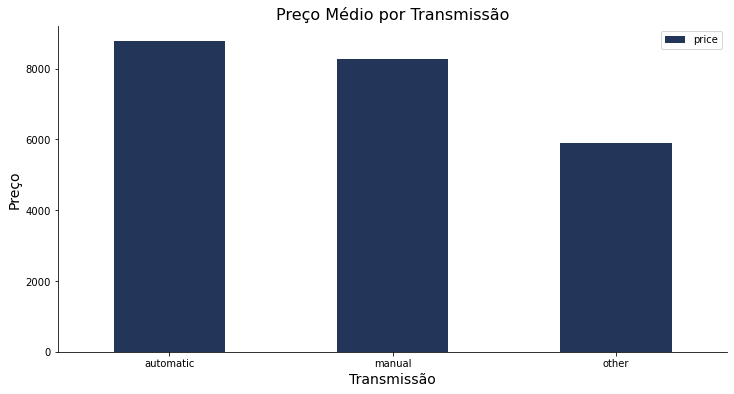

In [90]:
top_listed.pivot_table(index='transmission', values='price').plot(kind='bar', color='#233559', figsize=(12,6))
plt.legend()
plt.title('Preço Médio por Transmissão', fontsize=16)
plt.ylabel('Preço', fontsize=14)
plt.xlabel('Transmissão', fontsize=14)
plt.xticks(rotation=0)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
A transmissão não excerce inflûencia muito grande sobre o preço, podemos observar uma leve diferença entre manuais e automáticos. Já outras transmissões tendem a ter preços inferiores. Seria necessário entender melhor o que seriam as outras transmissões para uma análise mais profunda.
    </font>    
    <a id='f5'></a>
<h4><font face='Calibri' color="#1E90B6" size=+2.0>
Cor do veículo
</font></h4><p>
    
<font face='Calibri' color="#001A56" size=+0.8>
    Analisaremos agora o preço em relação as cores.

In [91]:
# Agrupando por cores
top_listed.pivot_table(index='paint_color',  columns='type', values='id_condition', aggfunc='count')

type,SUV,sedan
paint_color,,
black,2088,1757
blue,1011,1220
brown,351,254
custom,299,295
green,412,202
grey,1145,1609
orange,81,9
purple,38,23
red,871,932


<font face='Calibri' color="#001A56" size=+0.8>
    As cores laranja, roxo e amarelo ficarão de fora da analise por serem amostras pequenas.

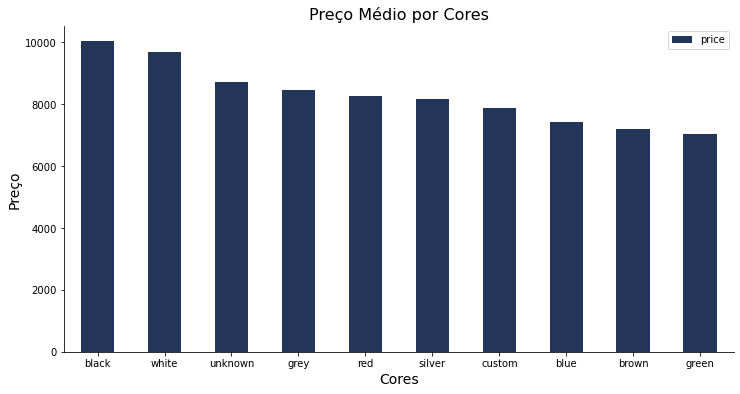

In [92]:
# Plotando o gráfico
top_listed.query('paint_color != "orange" and paint_color != "purple" and paint_color != "yellow"').pivot_table(
    index='paint_color', values='price').sort_values(by='price', ascending=False).plot(
    kind='bar', color='#233559', figsize=(12,6))

plt.legend()
plt.title('Preço Médio por Cores', fontsize=16)
plt.ylabel('Preço', fontsize=14)
plt.xlabel('Cores', fontsize=14)
plt.xticks(rotation=0)
sns.despine()

<font face='Calibri' color="#001A56" size=+0.8>
As cores branco e preto são as que tem o maior preço médio entre todas, porém as cores não tem impacto tão grande no preço, um indício é que carros sem informação de cor tem um preço próximo as cores mais "caras", ou seja, o fator cor de fato integra a composição do preço dos carros, porém com uma influência menor.

In [93]:
# Encontrando o preço médio por cor.
color_sample = top_listed.loc[top_listed['paint_color'] != 'orange']
color_sample = color_sample.loc[color_sample['paint_color'] != 'purple']
color_sample = color_sample.loc[color_sample['paint_color'] != 'yellow']
color_sample.pivot_table(index='paint_color', values='price').sort_values(by='price', ascending=False)

,price
paint_color,
black,10034.256697
white,9670.024724
unknown,8712.199907
grey,8453.348947
red,8278.266778
silver,8170.340354
custom,7871.621212
blue,7419.463469
brown,7189.519008


<font face='Calibri' color="#001A56" size=+0.8>
    
[Voltar ao Índice](#back)
        
 <p>   
    
<hr>

<a id='end'></a>
<h2><font face='Calibri' color="#001A56" size=+3.0>
Conclusão
    </font></h2>
    
<p>
<font face='Calibri' color="#001A56" size=+0.8>
O parâmetro que tem maior impacto sobre o preço é a Idade, podemos perceber que quanto mais velho o veículo menor o seu preço. A exceção para esse caso é em relação aos carros novos, que possuem uma média de preço mais baixa do que carros com 1 ano, esse ponto me leva a acreditar que onde são comercializados esses veículos deve haver algum incentivo (imposto reduzido, promoções, etc.) para compra de carros novos. Na coluna do ano do modelo, inicialmente haviam valores atípicos que foram excluídos dessa análise que contemplou apenas veículos com 24 anos ou menos, veículos muito antigos podem ter seus valores distorcidos pois muitas vezes são considerados itens de coleção, e não um veículos comuns como a maioria. Ainda na coluna <b>model_year</b> havia valores ausentes que foram preenchidos pela mediana dos dados agrupados por por modelo, tipo de transmissão e condições, vistos que essas características nos dão indicios do ano do modelo do veículo.

O segundo parâmetro que tem maior impacto é a quilometragem (<b>odometer</b>), esse parâmetro tem comportamento muito semelhante a idade, quanto maior quilometragem menor o preço e a exceção também ocorre para automóveis novos, o que pode reforçar a hipótese do incêntivo a compra de carros novos. A coluna <b>odometer</b> também possuia valores ausentes que foram preenchidos com a mediana dos dados agrupados por condições, foi utilizado a mediana devido a presença de valores atipicos que posteriormente foram excluídos.
    
<p>
    
O terceiro parâmetro com maior impacto sobre o preço foi a condição(<b>condition</b>), já era de se esperar que quanto mais depreciado o veículo menor o seu valor, para esse parâmetro não foi analisado os automóveis novos por ser uma amostra pequena, assim como a sucata.
    
Os parâmetros cor da pintura e transmissão (<b>paint_color</b> e <b>transmission</b>) não demonstra tanta influência sobre o preço, possuem médias de preço muito parecidas. Quanto as cores podemos observar que preto e branco de preços médios ligeiramente mais elevados que as demais cores, porém veículos com cores desconhecidas vem logo em seguida demonstrando que de fato a cor não tem grande influência sobre o preço.
    
Outra informação que podemos observar é que em média os SUV's possuem preços mais altos que os sedans, diante disso podemos afirmar que o tipo do veículos também influência no preço.
    
    
<p>
       
    
[Voltar ao Índice](#back) 
    
<hr>

<a id='fontes'></a>
<h2><font face='Calibri' color="#001A56" size=+3.0>
Fontes
     </font></h2>
    <p>
    
<font face='Calibri' color="#001A56" size=+0.8>
<ul>
    
<li> Documentação da biblioteca <a href="https://pandas.pydata.org/docs/" target="_blank"> Pandas</a>.
    
<li> Documentação da biblioteca <a href="https://seaborn.pydata.org/index.html" target="_blank">Seaborn</a>.
    
<li> Documentação da biblioteca <a href="https://matplotlib.org/stable/index.html" target="_blank">Matplotlib</a>.
   
<li> Galeria do site <a href="https://www.python-graph-gallery.com/" target="_blank">The Python Graph Gallery.

<a id='contato'></a>
<h2><font face='Calibri' color="#001A56" size=+3.0>
Contatos
     </font></h2>
    <p>
<font face='Calibri' color="#001A56" size=+0.8>
    <ul>
    <li><b>Autor:</b> Maycon Douglas dos Santos
    <p>    
    <li><b>E-mail:</b> mayconds13@live.com
    <p>  
    <li><b>LinkedIn:</b> <a href="https://www.linkedin.com/in/maycondouglasdossantos/"> linkedin.com/in/maycondouglasdossantos </a>
    <p>    
    <li><b>GitHub:</b> <a href="https://github.com/mayconddsantos"> github.com/mayconddsantos </a>
    <p>    
    <li><b>Repositório deste projeto:</b><a href="https://github.com/mayconddsantos/Projetos_Practicum"> github.com/mayconddsantos/Projetos_Practicum </a>
